<a href="https://colab.research.google.com/github/sidagarwal-labs/DSBA-6211---Advance-Business-Analytics/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv("HEMQ.csv")
df.describe(include='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [ ]:
# Explore missing values
df.isnull().sum()/len(df)

,0
BAD,0.000000
LOAN,0.000000
MORTDUE,0.086913
VALUE,0.018792
REASON,0.042282
JOB,0.046812
YOJ,0.086409
DEROG,0.118792
DELINQ,0.097315
CLAGE,0.051678


In [ ]:
#Option 1 Imputation Step - Simple
NA_names= ['MORTDUE', 'VALUE', 'YOJ', 'DEROG',
'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
df[NA_names]=df[NA_names].fillna(df[NA_names].mean())

In [ ]:
#Option 1 - fill in simple values
df['REASON']=df['REASON'].fillna('DebtCon')
df['JOB']=df['JOB'].fillna('Other')
df.describe(include='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960,5960,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4180,2667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,NaN,NaN,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,NaN,NaN,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,NaN,NaN,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,NaN,NaN,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892


In [ ]:
#Dummy coding for categorical variables (job and reason)
dummy_data=pd.get_dummies(df[['REASON','JOB']],drop_first=True)
X=pd.concat([df,dummy_data],axis=1)
X=X.drop(['REASON','JOB','BAD'],axis=1)

In [ ]:
#Describe the new x dataframe
X.describe(include='all')

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960,5960,5960,5960,5960,5960
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4180,5012,3293,4684,5851,5767
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915,NaN,NaN,NaN,NaN,NaN,NaN
std,11207.480417,42481.395689,56843.931566,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713,NaN,NaN,NaN,NaN,NaN,NaN
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,NaN,NaN,NaN,NaN,NaN,NaN
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159,NaN,NaN,NaN,NaN,NaN,NaN
50%,16300.000000,69529.000000,90000.000000,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915,NaN,NaN,NaN,NaN,NaN,NaN
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#set the dependent variable
y=df['BAD']

In [ ]:
#create the train and test data partition
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#import decision tree model from sklearn
from sklearn import tree
from sklearn.tree import export_text

dtree = tree.DecisionTreeClassifier(max_depth=4,
                                    min_samples_split=30,
                                    random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=30, random_state=0)

In [ ]:
#look at the decision tree structure
r=export_text(dtree,feature_names=list(X.columns))
print(r)

|--- DELINQ <= 0.72
|   |--- DEBTINC <= 45.66
|   |   |--- DEBTINC <= 33.78
|   |   |   |--- VALUE <= 23921.00
|   |   |   |   |--- class: 1
|   |   |   |--- VALUE >  23921.00
|   |   |   |   |--- class: 0
|   |   |--- DEBTINC >  33.78
|   |   |   |--- DEBTINC <= 33.78
|   |   |   |   |--- class: 1
|   |   |   |--- DEBTINC >  33.78
|   |   |   |   |--- class: 0
|   |--- DEBTINC >  45.66
|   |   |--- class: 1
|--- DELINQ >  0.72
|   |--- DEBTINC <= 33.84
|   |   |--- DEBTINC <= 33.76
|   |   |   |--- DEBTINC <= 9.53
|   |   |   |   |--- class: 1
|   |   |   |--- DEBTINC >  9.53
|   |   |   |   |--- class: 0
|   |   |--- DEBTINC >  33.76
|   |   |   |--- CLAGE <= 390.62
|   |   |   |   |--- class: 1
|   |   |   |--- CLAGE >  390.62
|   |   |   |   |--- class: 0
|   |--- DEBTINC >  33.84
|   |   |--- DEBTINC <= 43.57
|   |   |   |--- DELINQ <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- DELINQ >  4.50
|   |   |   |   |--- class: 1
|   |   |--- DEBTINC >  43.57
|   |   |   |--- cla

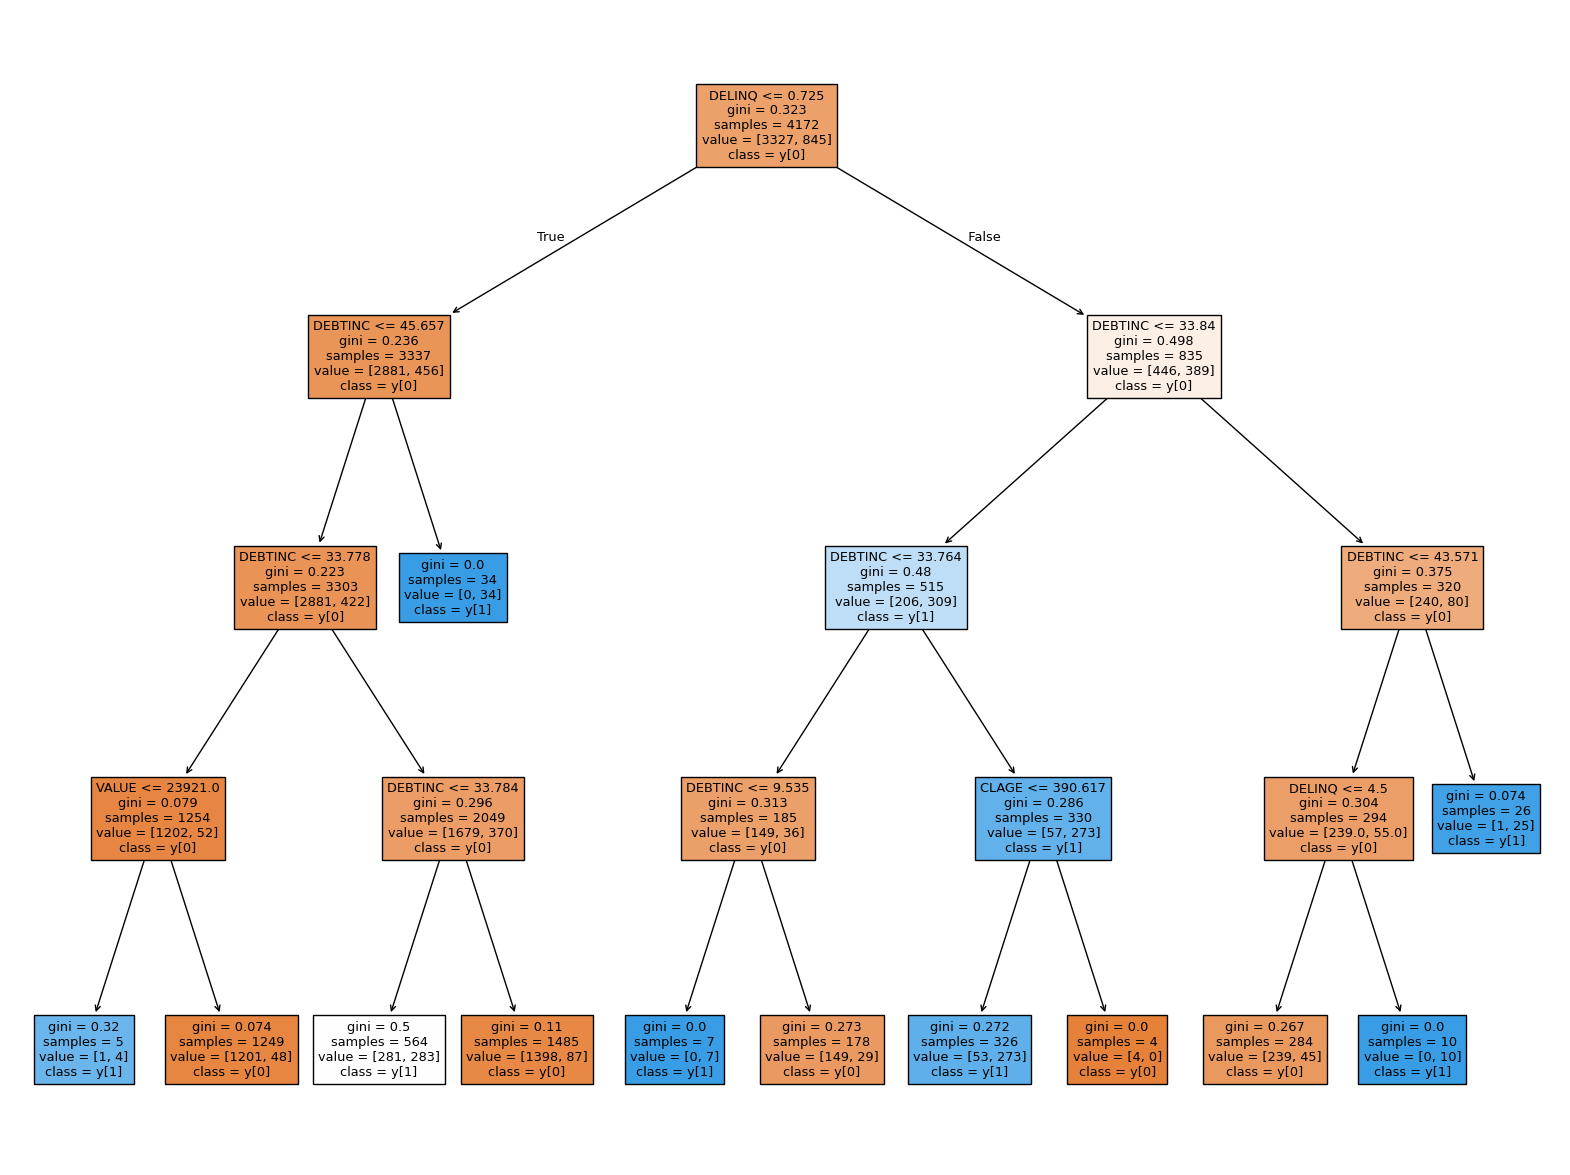

In [ ]:
#visualize the decision tree model
plt.figure(figsize=[20,15])
tree.plot_tree(dtree,
               feature_names=list(X.columns),
               class_names=True,
               filled=True)
plt.show()

In [ ]:
#Explaining this decision tree output
#1. Summarize finding of Decision Tree:
#The tree shows that Delinquencies is the most important and first split.
#As delinq increases, so does chances of BAD. Then it is debtincome ratio.
#If you have low delinq, then we see if youre debtincom is greater than 44.657,
#If yes, then probability is 100%. But if it is less than, continue splitting.
#2. Compare decision tree vs Regression:
#Decision tree uses way less variables.
#It also includes Value, which was dropped in linear regression (due to VIF, mulitcolinearity) which Decision tree is not impacted by.

In [ ]:
#test decision tree model on the validation dataset
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
prediction = dtree.predict(X_val)
confusion_matrix(y_val, prediction)

array([[1300,  144],
       [  87,  257]])

In [ ]:
#Check overall score
dtree.score(X_val,y_val)

0.8708053691275168

In [ ]:
#calculate AUC scores
prediction_prob=dtree.predict_proba(X_val)
tree_auc=roc_auc_score(y_val,prediction_prob[:,1])
print(tree_auc)

0.8629281952586485


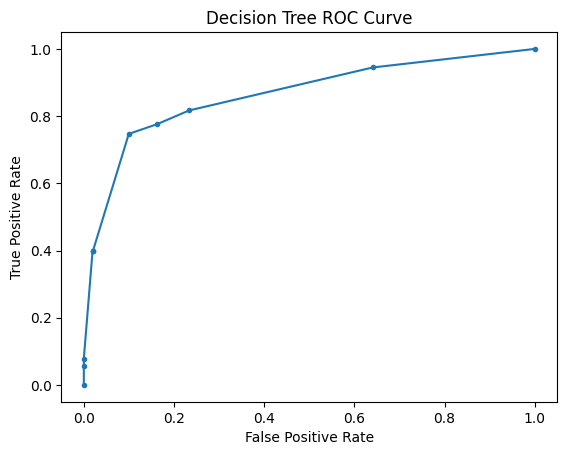

In [ ]:
#calculate the ROC curve
tree_fpr, tree_tpr, _ = roc_curve(y_val, prediction_prob[:,1])
plt.plot(tree_fpr, tree_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()